In [1]:
import pandas as pd
import numpy as np
np.random.seed(2021)
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

In [2]:
train=pd.read_excel('df.xlsx')
train.shape

(416, 10)

In [4]:
train.sample(10)

,Depth,Density,Porosity,Poisson,Vp,Vs,TP2,TP1,TS2,TS1
201,15.5,NaN,NaN,0.481,1446.55,279.72,1430.81,739.51,8736.81,5161.86
229,29.5,NaN,NaN,0.472,2254.18,516.38,953.36,509.74,3751.67,1815.10
152,33.5,2.24,0.321,0.475,2019.76,436.59,1005.89,510.41,5761.87,3470.85
359,16.0,NaN,NaN,0.488,1734.82,269.24,1298.93,722.50,9919.94,6205.71
256,5.0,NaN,NaN,0.497,1582.98,123.56,1319.81,688.09,17609.04,9516.01
370,21.5,NaN,NaN,0.476,1601.88,340.75,1327.65,703.38,6219.66,3284.96
215,22.5,NaN,NaN,0.480,1623.08,320.52,1257.80,641.69,6739.59,3619.70
92,3.5,NaN,NaN,0.494,1566.63,175.09,1303.52,665.16,13369.60,7644.97
214,22.0,1.86,NaN,0.480,1659.14,321.53,1287.97,685.25,7188.91,4078.81
62,32.0,2.28,NaN,0.459,2116.67,582.47,1003.90,531.50,3655.00,1938.20


## Data preparation

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Depth     416 non-null    float64
 1   Density   111 non-null    float64
 2   Porosity  70 non-null     float64
 3   Poisson   416 non-null    float64
 4   Vp        416 non-null    float64
 5   Vs        416 non-null    float64
 6   TP2       416 non-null    float64
 7   TP1       416 non-null    float64
 8   TS2       416 non-null    float64
 9   TS1       416 non-null    float64
dtypes: float64(10)
memory usage: 32.6 KB


In [6]:
train = train.drop('Porosity', axis=1)

In [7]:
df=train.dropna(axis='rows')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 58 to 415
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Depth    111 non-null    float64
 1   Density  111 non-null    float64
 2   Poisson  111 non-null    float64
 3   Vp       111 non-null    float64
 4   Vs       111 non-null    float64
 5   TP2      111 non-null    float64
 6   TP1      111 non-null    float64
 7   TS2      111 non-null    float64
 8   TS1      111 non-null    float64
dtypes: float64(9)
memory usage: 8.7 KB


In [8]:
df.sample(5)

,Depth,Density,Poisson,Vp,Vs,TP2,TP1,TS2,TS1
227,28.5,2.05,0.458,2126.32,590.95,988.79,518.49,4246.83,2554.65
195,12.5,1.98,0.485,1661.19,285.92,1350.88,748.90,8470.60,4973.15
112,13.5,2.01,0.488,1544.36,231.08,1354.65,707.12,13327.72,8969.24
79,40.5,1.98,0.464,1458.76,379.58,1264.80,579.20,10735.00,8100.50
396,34.5,2.04,0.468,1362.39,333.82,1368.15,634.15,6103.40,3107.77


## Basic Model

## Predict density

In [9]:
y = df['Density']

In [10]:
X = df[['Depth', 'Poisson', 'Vp', 'Vs', 'TP2', 'TP1', 'TS2', 'TS1']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
xgb_reg = xgb.XGBRegressor(colsample_bytree= 0.8,
gamma= 0.1,
  learning_rate= 0.1,
  max_depth= 8,
  min_child_weight= 2,
  n_estimators= 100,
  nthread= 4,
  objective= 'reg:squarederror',
  scale_pos_weight= 1,
  seed= 27,
  subsample= 0.8, random_state=2021)

In [14]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [15]:
predict=xgb_reg.predict(X_test)

In [16]:
rmse = np.sqrt(mean_squared_error(y_test, predict))
print("RMSE: %f" % (rmse))

RMSE: 0.108393


In [17]:
score = xgb_reg.score(X_train, y_train)
print("Training score: ", score)

Training score:  0.6760566006629376


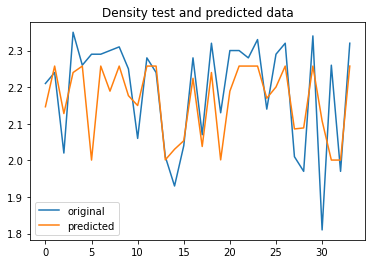

In [18]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predict, label="predicted")
plt.title("Density test and predicted data")
plt.legend()
plt.show()

In [19]:
test=pd.read_excel('df.xlsx')

In [20]:
test.head()

,Depth,Density,Porosity,Poisson,Vp,Vs,TP2,TP1,TS2,TS1
0,1.0,NaN,NaN,0.448,3616.17,108.06,975.2,698.7,2593.3,1690.8
1,1.5,NaN,NaN,0.484,2085.48,367.41,1170.7,691.2,9444.8,6723.0
2,2.0,NaN,NaN,0.487,1541.31,243.55,1335.0,686.2,14933.6,10827.6
3,2.5,NaN,NaN,0.479,1559.33,311.92,1335.0,693.7,13268.6,10062.6
4,3.0,NaN,NaN,0.470,1568.93,376.07,1335.8,698.4,12247.0,9587.9


In [21]:
test = test.drop('Porosity', axis=1)
test = test.drop('Density', axis=1)

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Depth    416 non-null    float64
 1   Poisson  416 non-null    float64
 2   Vp       416 non-null    float64
 3   Vs       416 non-null    float64
 4   TP2      416 non-null    float64
 5   TP1      416 non-null    float64
 6   TS2      416 non-null    float64
 7   TS1      416 non-null    float64
dtypes: float64(8)
memory usage: 26.1 KB


In [23]:
X = test[['Depth', 'Poisson', 'Vp', 'Vs', 'TP2', 'TP1', 'TS2', 'TS1']]

In [24]:
X_test = scaler.transform(X)

In [25]:
density = xgb_reg.predict(X_test)
density

array([2.1454306, 2.1589835, 2.0013638, 2.0008223, 2.0303423, 2.0013638,
       2.0013638, 2.0013638, 2.0013638, 2.0013638, 2.0013638, 2.0198662,
       2.0581763, 2.0581763, 2.0581763, 2.0581763, 2.0198662, 2.0581763,
       2.0013638, 2.0013638, 2.0013638, 2.0581763, 2.1104374, 2.1104374,
       2.1104374, 2.1324139, 2.0879567, 2.1393685, 2.1188362, 2.1408126,
       2.1283355, 2.1188362, 2.0963554, 2.1188362, 2.1324139, 2.1324139,
       2.1324139, 2.1324139, 2.1188362, 2.1326485, 2.1220841, 2.1402442,
       2.1169517, 2.155617 , 2.1497436, 2.2575917, 2.2575917, 2.2575917,
       2.2575917, 2.2575917, 2.2575917, 2.2575917, 2.2575917, 2.2575917,
       2.2575917, 2.2575917, 2.2275155, 2.2575917, 2.2575917, 2.2575917,
       2.2575917, 2.2575917, 2.2575917, 2.2575917, 2.2575917, 2.2575917,
       2.2575917, 2.2575917, 2.2480924, 2.2241948, 2.1458666, 2.1612394,
       2.0008223, 2.0303423, 2.1613655, 2.0581763, 2.066575 , 2.138827 ,
       2.1683471, 2.1683471, 2.1483264, 2.1778464, 

In [26]:
test['density'] = density
test.head()

,Depth,Poisson,Vp,Vs,TP2,TP1,TS2,TS1,density
0,1.0,0.448,3616.17,108.06,975.2,698.7,2593.3,1690.8,2.145431
1,1.5,0.484,2085.48,367.41,1170.7,691.2,9444.8,6723.0,2.158983
2,2.0,0.487,1541.31,243.55,1335.0,686.2,14933.6,10827.6,2.001364
3,2.5,0.479,1559.33,311.92,1335.0,693.7,13268.6,10062.6,2.000822
4,3.0,0.470,1568.93,376.07,1335.8,698.4,12247.0,9587.9,2.030342


In [27]:
test.to_excel('df_density.xlsx')

## Predict porosity

In [28]:
phie=pd.read_excel('phie.xlsx')
phie.head()

,Unnamed: 0,Depth,Poisson,Vp,Vs,TP2,TP1,TS2,TS1,density,Porosity
0,0,1.0,0.448,3616.17,1108.06,975.2,698.7,2593.3,1690.8,2.199117,NaN
1,1,1.5,0.484,2085.48,367.41,1170.7,691.2,9444.8,6723.0,2.145491,NaN
2,2,2.0,0.487,1541.31,243.55,1335.0,686.2,14933.6,10827.6,2.005254,NaN
3,3,2.5,0.479,1559.33,311.92,1335.0,693.7,13268.6,10062.6,2.027521,NaN
4,4,3.0,0.470,1568.93,376.07,1335.8,698.4,12247.0,9587.9,2.027521,NaN


In [29]:
phie = phie.drop('Unnamed: 0', axis=1)

In [30]:
phie=phie.dropna(axis='rows')
phie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 58 to 415
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Depth     70 non-null     float64
 1   Poisson   70 non-null     float64
 2   Vp        70 non-null     float64
 3   Vs        70 non-null     float64
 4   TP2       70 non-null     float64
 5   TP1       70 non-null     float64
 6   TS2       70 non-null     float64
 7   TS1       70 non-null     float64
 8   density   70 non-null     float64
 9   Porosity  70 non-null     float64
dtypes: float64(10)
memory usage: 6.0 KB


In [31]:
y = phie['Porosity']

In [32]:
X = phie[['Depth', 'Poisson', 'Vp', 'Vs', 'TP2', 'TP1', 'TS2', 'TS1', 'density']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
xgb_reg = xgb.XGBRegressor(colsample_bytree= 0.8,
gamma= 0.1,
  learning_rate= 0.1,
  max_depth= 8,
  min_child_weight= 2,
  n_estimators= 100,
  nthread= 4,
  objective= 'reg:squarederror',
  scale_pos_weight= 1,
  seed= 27,
  subsample= 0.8, random_state=2021)

In [36]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=8,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.8, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [37]:
predict=xgb_reg.predict(X_test)

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, predict))
print("RMSE: %f" % (rmse))

RMSE: 0.121118


In [39]:
score = xgb_reg.score(X_train, y_train)
print("Training score: ", score)

Training score:  0.8342344057314433


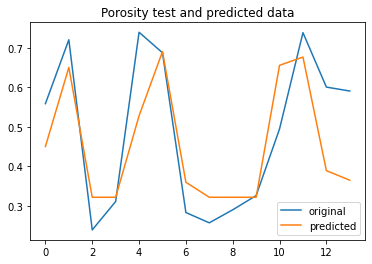

In [40]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, predict, label="predicted")
plt.title("Porosity test and predicted data")
plt.legend()
plt.show()

In [41]:
test=pd.read_excel('df2.xlsx')

In [42]:
test.head()

,Unnamed: 0,Depth,Poisson,Vp,Vs,TP2,TP1,TS2,TS1,density
0,0,1.0,0.448,3616.17,108.06,975.2,698.7,2593.3,1690.8,2.145431
1,1,1.5,0.484,2085.48,367.41,1170.7,691.2,9444.8,6723.0,2.158983
2,2,2.0,0.487,1541.31,243.55,1335.0,686.2,14933.6,10827.6,2.001364
3,3,2.5,0.479,1559.33,311.92,1335.0,693.7,13268.6,10062.6,2.000822
4,4,3.0,0.470,1568.93,376.07,1335.8,698.4,12247.0,9587.9,2.030342


In [43]:
X = test[['Depth', 'Poisson', 'Vp', 'Vs', 'TP2', 'TP1', 'TS2', 'TS1', 'density']]

In [44]:
X_test = scaler.transform(X)

In [45]:
porosity = xgb_reg.predict(X_test)
porosity

array([0.5072495 , 0.3766812 , 0.6909895 , 0.6771842 , 0.6771842 ,
       0.6909895 , 0.6909895 , 0.6909895 , 0.6909895 , 0.6909895 ,
       0.6909895 , 0.53023803, 0.53023803, 0.5059805 , 0.5059805 ,
       0.6909895 , 0.6909895 , 0.6909895 , 0.6909895 , 0.6909895 ,
       0.6909895 , 0.5059805 , 0.5059805 , 0.471162  , 0.471162  ,
       0.471162  , 0.471162  , 0.45193884, 0.4713491 , 0.47619638,
       0.45193884, 0.45193884, 0.47619638, 0.45193884, 0.49541953,
       0.49541953, 0.49541953, 0.47619638, 0.45193884, 0.43813357,
       0.47422087, 0.47422087, 0.47422087, 0.47422087, 0.47422087,
       0.34555185, 0.34555185, 0.34555185, 0.34555185, 0.34555185,
       0.34555185, 0.34555185, 0.32173637, 0.32173637, 0.32173637,
       0.32173637, 0.32173637, 0.32173637, 0.32173637, 0.32173637,
       0.32173637, 0.32173637, 0.32173637, 0.32173637, 0.32173637,
       0.32173637, 0.32173637, 0.32173637, 0.32173637, 0.32173637,
       0.41431808, 0.32173637, 0.41431808, 0.45040536, 0.32173

In [46]:
test['porosity2'] = porosity
test.head()

,Unnamed: 0,Depth,Poisson,Vp,Vs,TP2,TP1,TS2,TS1,density,porosity2
0,0,1.0,0.448,3616.17,108.06,975.2,698.7,2593.3,1690.8,2.145431,0.507249
1,1,1.5,0.484,2085.48,367.41,1170.7,691.2,9444.8,6723.0,2.158983,0.376681
2,2,2.0,0.487,1541.31,243.55,1335.0,686.2,14933.6,10827.6,2.001364,0.690989
3,3,2.5,0.479,1559.33,311.92,1335.0,693.7,13268.6,10062.6,2.000822,0.677184
4,4,3.0,0.470,1568.93,376.07,1335.8,698.4,12247.0,9587.9,2.030342,0.677184


In [47]:
test.to_excel('porosity.xlsx')